# 프로젝트 개요

'보험사기행위'란 보험사고의 발생, 원인 또는 내용에 관하여 보험자를 기망하여 보험금을 청구하는 행위를 말합니다.
「보험사기방지 특별법」(2016.9.30. 시행) 제2조.

2019년 중 보험사기 적발금액은 8,809억원으로 전년(7,982억원) 대비 827억원(10.4%↑) 증가하였고 이는 역대 최고 수준입니다.
동년 보험사기 적발 인원은 92,538명으로 2015년 이후 정체, 감소추세를 보이다가 2019년 들어 크게 증가하는 모습을 보였습니다.(13,359명, 16.9%↑)

대다수의 보험사기가 1인당 평균 적발금액(9.5백만원) 미만으로 비교적 소액의 보험사기이지만 불특정 다수의 보험소비자가 상해,질병 또는 자동차사고 등의 피해를 과장하거나 사실을 왜곡하여 보험금을 청구하는 생계형 보험사기가 증가한 것으로 보험사기는 이용하기 쉽지만 대처하기 어려운 범죄행위로 분석됩니다


보험사기에 대한 적발금액과 적발인원이 역대 최고 수준으로 급증하고 직업・연령・성별에 관계없이 불특정 다수의 보험소비자가 범죄라는 인식 없이 피해를 과장하거나, 사실을 왜곡하여 보험금을 청구하는 보험사기에 가담하고 있습니다. 이러한 보험사기를 사전에 예방하기 위해 보험 사기자와 일반인에 대한 여러 데이터를 분석하고 보험사기자를 예측할 수 있는 분석모델을 만들어 보험사기에 대한 대처를 하고자 합니다.

사용 데이터 : 'H'보험회사의 약 10여년 간의 보험사기자와 일반고객으로 구분하여 구성된 데이터.
            

# 데이터 불러오기

## 라이브러리 로드 및 기본 설정

In [3]:
#화면 및 폰트 글씨 크기 스타일를 조정합니다.
from IPython.core.display import display, HTML 
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: D2Coding; font-size: 12pt;}
div.output { font-size: 12pt; font-weight: bold;}
div.input { font-family: D2Coding; font-size: 12pt;}
div.prompt { min-width: 100px;}
</style>
"""))


In [4]:
#필요한 라이브러리를 로드합니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# pip install missingno
import missingno
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# pip install xgboost
from xgboost import XGBClassifier
# pip install lightgbm
from lightgbm import LGBMClassifier
# pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier


In [5]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version


Pandas : 1.0.3
Numpy : 1.18.3
Scikit-Learn : 0.22.2.post1
Python 3.7.1


In [6]:
# 데이터 프레임을 화면에 출력할 때 보이는 최대 열의 갯수를 지정합니다.
pd.options.display.max_columns = 999


## 데이터 불러오기

In [7]:
cust = pd.read_csv("CUST_DATA.csv", encoding="UTF-16")
claim = pd.read_csv("CLAIM_DATA.csv", encoding="UTF-16")


# EDA

## CUST_DATA

### 기본정보 탐색

In [8]:
cust.shape


(22400, 25)

In [9]:
cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           22400 non-null  int64  
 1   DIVIDED_SET       22400 non-null  int64  
 2   SIU_CUST_YN       20607 non-null  object 
 3   SEX               22400 non-null  int64  
 4   AGE               22400 non-null  int64  
 5   RESI_COST         22400 non-null  int64  
 6   RESI_TYPE_CODE    21146 non-null  float64
 7   FP_CAREER         22400 non-null  object 
 8   CUST_RGST         21944 non-null  float64
 9   CTPR              21779 non-null  object 
 10  OCCP_GRP_1        21805 non-null  object 
 11  OCCP_GRP_2        21805 non-null  object 
 12  TOTALPREM         16609 non-null  float64
 13  MINCRDT           12924 non-null  float64
 14  MAXCRDT           12924 non-null  float64
 15  WEDD_YN           21927 non-null  object 
 16  MATE_OCCP_GRP_1   10573 non-null  object

In [10]:
cust.describe(include="all")


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,20607,22400.000000,22400.000000,22400.000000,21146.000000,22400,21944.000000,21779,21805,21805,1.660900e+04,12924.000000,12924.000000,21927,10573,10573,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,17,8,25,NaN,NaN,NaN,2,8,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,N,NaN,경기,8.기타,주부,NaN,NaN,NaN,Y,1.주부,주부,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18801,NaN,NaN,NaN,NaN,21182,NaN,5200,4879,4837,NaN,NaN,NaN,12010,2394,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11200.500000,1.080045,NaN,1.565134,44.734866,15914.413973,25.765251,NaN,198924.250638,NaN,NaN,NaN,2.998266e+07,5.838904,19.480656,NaN,NaN,NaN,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,NaN,0.495750,15.445707,14963.317519,20.691869,NaN,16989.329112,NaN,NaN,NaN,4.897438e+07,3.515198,32.363151,NaN,NaN,NaN,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,NaN,1.000000,2.000000,0.000000,11.000000,NaN,101.000000,NaN,NaN,NaN,5.000000e+02,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,NaN,1.000000,34.000000,6732.750000,20.000000,NaN,200306.000000,NaN,NaN,NaN,6.665459e+06,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,NaN,2.000000,46.000000,12222.000000,20.000000,NaN,200306.000000,NaN,NaN,NaN,1.622463e+07,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,NaN,2.000000,56.000000,20988.000000,30.000000,NaN,200402.000000,NaN,NaN,NaN,3.479439e+07,6.000000,7.000000,NaN,NaN,NaN,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000


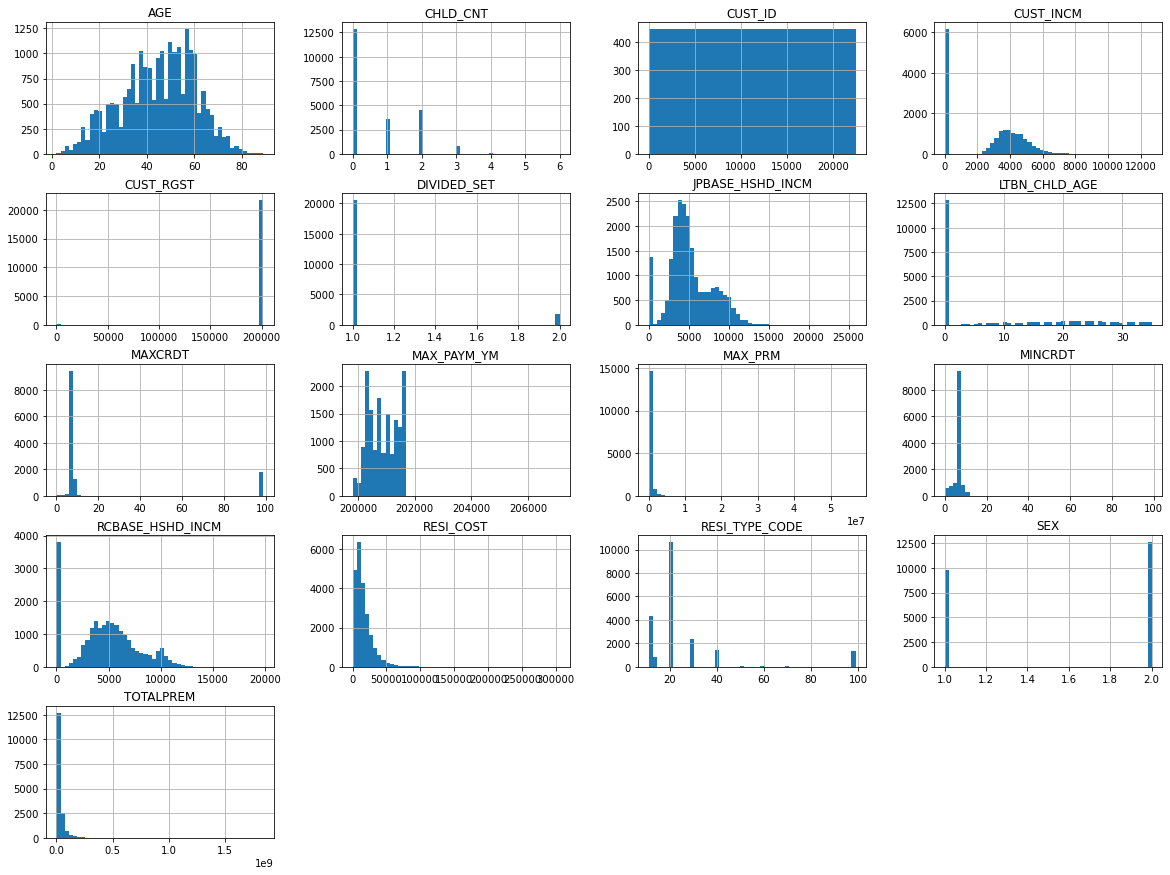

In [11]:
cust.hist(bins=50, figsize=(20,15))
plt.show()


### 결측치 분포 확인

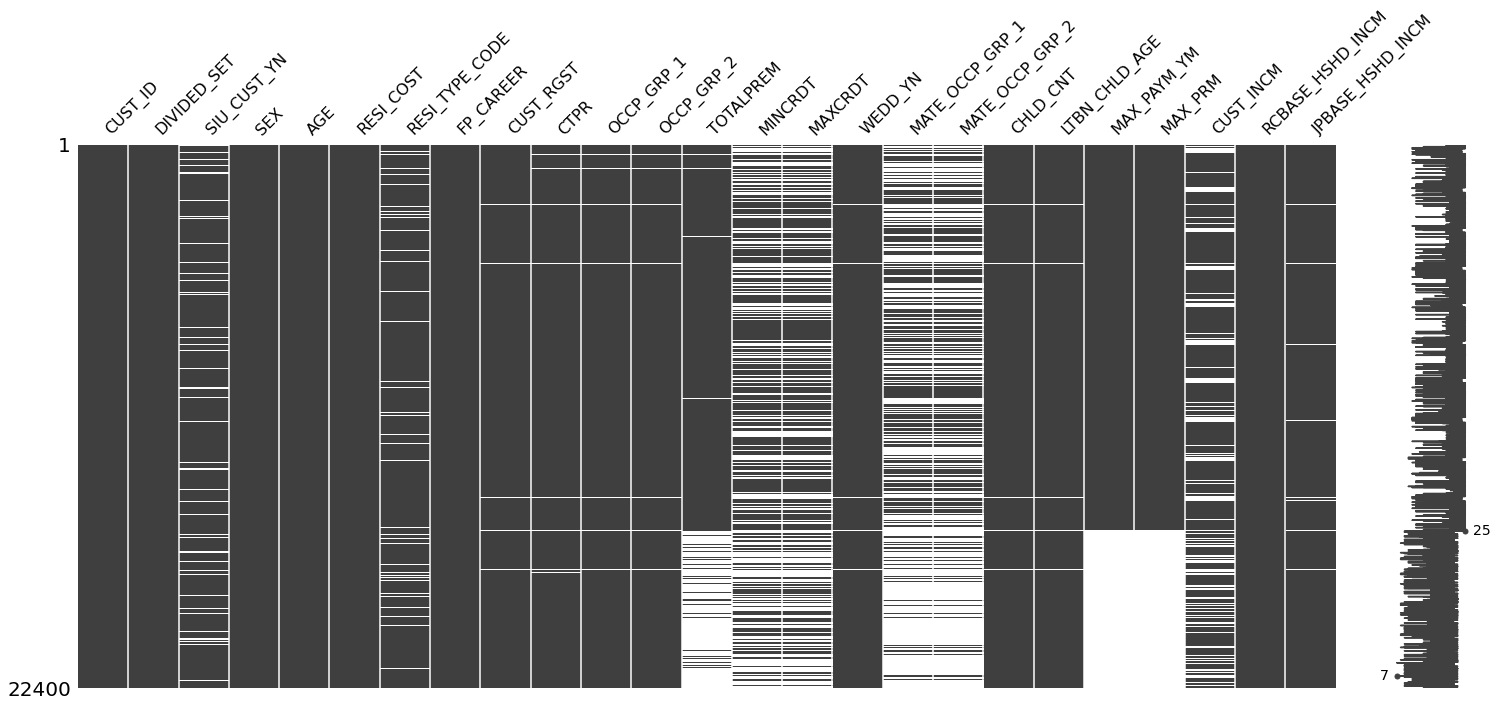

In [12]:
missingno.matrix(cust)
plt.show()


### 변수별 정보 확인

In [13]:
# 일반인(N)과 보험 사기자(Y)의 수를 확인
cust['SIU_CUST_YN'].value_counts()


N    18801
Y     1806
Name: SIU_CUST_YN, dtype: int64

In [14]:
#(당사 FP로써) Y: 경력 있음, N: 경력 없음
cust['FP_CAREER'].value_counts()


N    21182
Y     1218
Name: FP_CAREER, dtype: int64

In [15]:
#고객의 거주 시/도
cust['CTPR'].value_counts()


경기    5200
서울    3667
경남    1595
부산    1519
인천    1465
전남    1119
대구     998
경북     981
전북     962
광주     863
충남     767
울산     708
충북     623
강원     571
대전     510
제주     190
세종      41
Name: CTPR, dtype: int64

In [16]:
# 총 8개의 직업군으로 분류한 코드
cust['OCCP_GRP_1'].value_counts()


8.기타      4879
1.주부      4820
3.사무직     3327
5.서비스     2800
2.자영업     2301
4.전문직     1979
6.제조업     1364
7.1차산업     335
Name: OCCP_GRP_1, dtype: int64

In [17]:
# 총 25개의 직업군으로 분류한 코드
cust['OCCP_GRP_2'].value_counts()


주부          4837
학생          3953
사무직         2517
3차산업 종사자    2089
자영업         2067
2차산업 종사자    2031
운전직          528
기타           457
공무원          442
교육관련직        424
1차산업 종사자     386
전문직          378
의료직 종사자      347
단순 사무직       317
교사           266
단순 노무직       204
예체능계 종사자     171
기업/단체 임원     128
종교인/역술인       74
고위 공무원        47
학자/연구직        44
고소득의료직        40
대학교수/강사       34
고소득 전문직       19
법무직 종사자        5
Name: OCCP_GRP_2, dtype: int64

In [18]:
# 결혼 유무(Y: 결혼함, N: 결혼 안 함)
cust['WEDD_YN'].value_counts()


Y    12010
N     9917
Name: WEDD_YN, dtype: int64

In [19]:
# 배우자 직업코드1: 총 8개 직업
cust['MATE_OCCP_GRP_1'].value_counts()


1.주부      2394
3.사무직     2051
5.서비스     1523
2.자영업     1418
6.제조업     1157
4.전문직     1058
8.기타       636
7.1차산업     336
Name: MATE_OCCP_GRP_1, dtype: int64

In [20]:
# 배우자 직업코드2: 총 25개 직업
cust['MATE_OCCP_GRP_2'].value_counts()


주부          2402
사무직         1662
2차산업 종사자    1480
자영업         1322
3차산업 종사자     941
운전직          587
1차산업 종사자     388
전문직          259
공무원          241
기타           239
교육관련직        170
단순 노무직       160
기업/단체 임원     137
교사           131
단순 사무직       113
의료직 종사자       99
예체능계 종사자      48
종교인/역술인       43
고위 공무원        38
고소득의료직        30
학생            30
대학교수/강사       25
학자/연구직        22
고소득 전문직        6
Name: MATE_OCCP_GRP_2, dtype: int64

## CLAIM_DATA

### 기본정보 탐색

In [21]:
claim.shape


(119020, 39)

In [22]:
claim.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119020 entries, 0 to 119019
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CUST_ID          119020 non-null  int64  
 1   POLY_NO          119020 non-null  int64  
 2   ACCI_OCCP_GRP1   117603 non-null  object 
 3   ACCI_OCCP_GRP2   117603 non-null  object 
 4   CHANG_FP_YN      119020 non-null  object 
 5   CNTT_RECP_SQNO   119020 non-null  int64  
 6   RECP_DATE        119020 non-null  int64  
 7   ORIG_RESN_DATE   119020 non-null  int64  
 8   RESN_DATE        119020 non-null  int64  
 9   CRNT_PROG_DVSN   119020 non-null  int64  
 10  ACCI_DVSN        119020 non-null  int64  
 11  CAUS_CODE        119020 non-null  object 
 12  CAUS_CODE_DTAL   119020 non-null  object 
 13  DSAS_NAME        119020 non-null  object 
 14  DMND_RESN_CODE   119020 non-null  int64  
 15  DMND_RSCD_SQNO   119020 non-null  int64  
 16  HOSP_OTPA_STDT   86449 non-null   floa

In [23]:
claim.describe(include='all')


,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,ACCI_DVSN,CAUS_CODE,CAUS_CODE_DTAL,DSAS_NAME,DMND_RESN_CODE,DMND_RSCD_SQNO,HOSP_OTPA_STDT,HOSP_OTPA_ENDT,RESL_CD1,RESL_NM1,VLID_HOSP_OTDA,HOUSE_HOSP_DIST,HOSP_CODE,ACCI_HOSP_ADDR,HOSP_SPEC_DVSN,CHME_LICE_NO,PAYM_DATE,DMND_AMT,PAYM_AMT,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
count,119020.000000,119020.000000,117603,117603,119020,1.190200e+05,1.190200e+05,1.190200e+05,1.190200e+05,119020.000000,119020.000000,119020,119020,119020,119020.000000,119020.000000,8.644900e+04,8.644900e+04,119020,119020,119020.000000,101972.000000,1.190110e+05,108950,119011.000000,1.190200e+05,1.190070e+05,1.190200e+05,1.190200e+05,119020,1.896700e+04,1.896700e+04,1.896700e+04,1.896700e+04,1.896700e+04,18967.000000,8.057000e+03,119020.000000,119020
unique,NaN,NaN,8,25,2,NaN,NaN,NaN,NaN,NaN,NaN,943,136,63420,NaN,NaN,NaN,NaN,912,911,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,8.기타,주부,N,NaN,NaN,NaN,NaN,NaN,NaN,W01,#,제왕절개술,NaN,NaN,NaN,NaN,S13,목부위의 관절및인대의 탈구|염좌및긴장(경추),NaN,NaN,NaN,서울,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,NaN,28423,25339,71386,NaN,NaN,NaN,NaN,NaN,NaN,15297,52091,489,NaN,NaN,NaN,NaN,5342,5342,NaN,NaN,NaN,23630,NaN,NaN,NaN,NaN,NaN,100053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115685
mean,11124.551504,47298.259965,NaN,NaN,NaN,2.012184e+12,2.011685e+07,2.011086e+07,2.011482e+07,21.567829,2.352697,NaN,NaN,NaN,3.089237,1.246312,2.011629e+07,2.011703e+07,NaN,NaN,8.721509,24.920284,7.971912e+03,NaN,28.686760,1.404356e+06,2.011697e+07,8.114452e+05,8.055836e+05,NaN,1.151285e+05,2.940175e+05,1.544454e+04,4.245879e+05,5.609277e+03,1.050931,1.110890e+05,0.087370,NaN
std,6462.759097,32103.972700,NaN,NaN,NaN,9.597075e+09,2.800165e+04,2.859218e+04,2.766586e+04,5.750613,0.890724,NaN,NaN,NaN,1.428316,0.833369,2.727863e+04,2.732307e+04,NaN,NaN,13.230779,58.942734,5.020564e+05,NaN,24.932621,1.171176e+07,2.800625e+04,4.174797e+06,4.112618e+06,NaN,2.061213e+05,6.692292e+05,2.803789e+05,8.460542e+05,8.306801e+04,0.244609,3.862795e+05,0.243291,NaN
min,1.000000,1.000000,NaN,NaN,NaN,2.006010e+12,2.006010e+07,1.999043e+07,2.006010e+07,11.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,2.006010e+07,2.006010e+07,NaN,NaN,0.000000,0.000000,2.000000e+00,NaN,10.000000,6.000000e+00,2.006010e+07,0.000000e+00,0.000000e+00,NaN,-7.600000e+03,-3.170000e+04,0.000000e+00,0.000000e+00,-1.590000e+03,0.000000,0.000000e+00,-1.056667,NaN
25%,5588.000000,18544.000000,NaN,NaN,NaN,2.009120e+12,2.009120e+07,2.009041e+07,2.009092e+07,23.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,2.009122e+07,2.010012e+07,NaN,NaN,0.000000,1.620000,1.887000e+03,NaN,10.000000,7.324000e+03,2.009121e+07,1.000000e+05,1.000000e+05,NaN,1.830000e+04,2.000000e+04,0.000000e+00,7.199300e+04,0.000000e+00,1.000000,1.000000e+04,0.000000,NaN
50%,11203.000000,39485.000000,NaN,NaN,NaN,2.012052e+12,2.012051e+07,2.011090e+07,2.012022e+07,23.000000,3.000000,NaN,NaN,NaN,2.000000,1.000000,2.012042e+07,2.012053e+07,NaN,NaN,5.000000,4.540000,5.135000e+03,NaN,20.000000,1.289400e+04,2.012052e+07,2.400000e+05,2.400000e+05,NaN,5.407500e+04,8.300000e+04,0.000000e+00,1.723000e+05,0.000000e+00,1.000000,2.500000e+04,0.000000,NaN
75%,16663.000000,78791.000000,NaN,NaN,NaN,2.014071e+12,2.014063e+07,2.013112e+07,2.014033e+07,23.000000,3.000000,NaN,NaN,NaN,5.000000,1.000000,2.014050e+07,2.014061e+07,NaN,NaN,13.000000,15.330000,7.870000e+03,NaN,30.000000,1.916300e+04,2.014070e+07,5.000000e+05,5.000000e+05,NaN,1.383150e+05,2.800000e+05,0.000000e+00,4.424950e+05,4.700000e+01,1.000000,9.852000e+04,0.000000,NaN


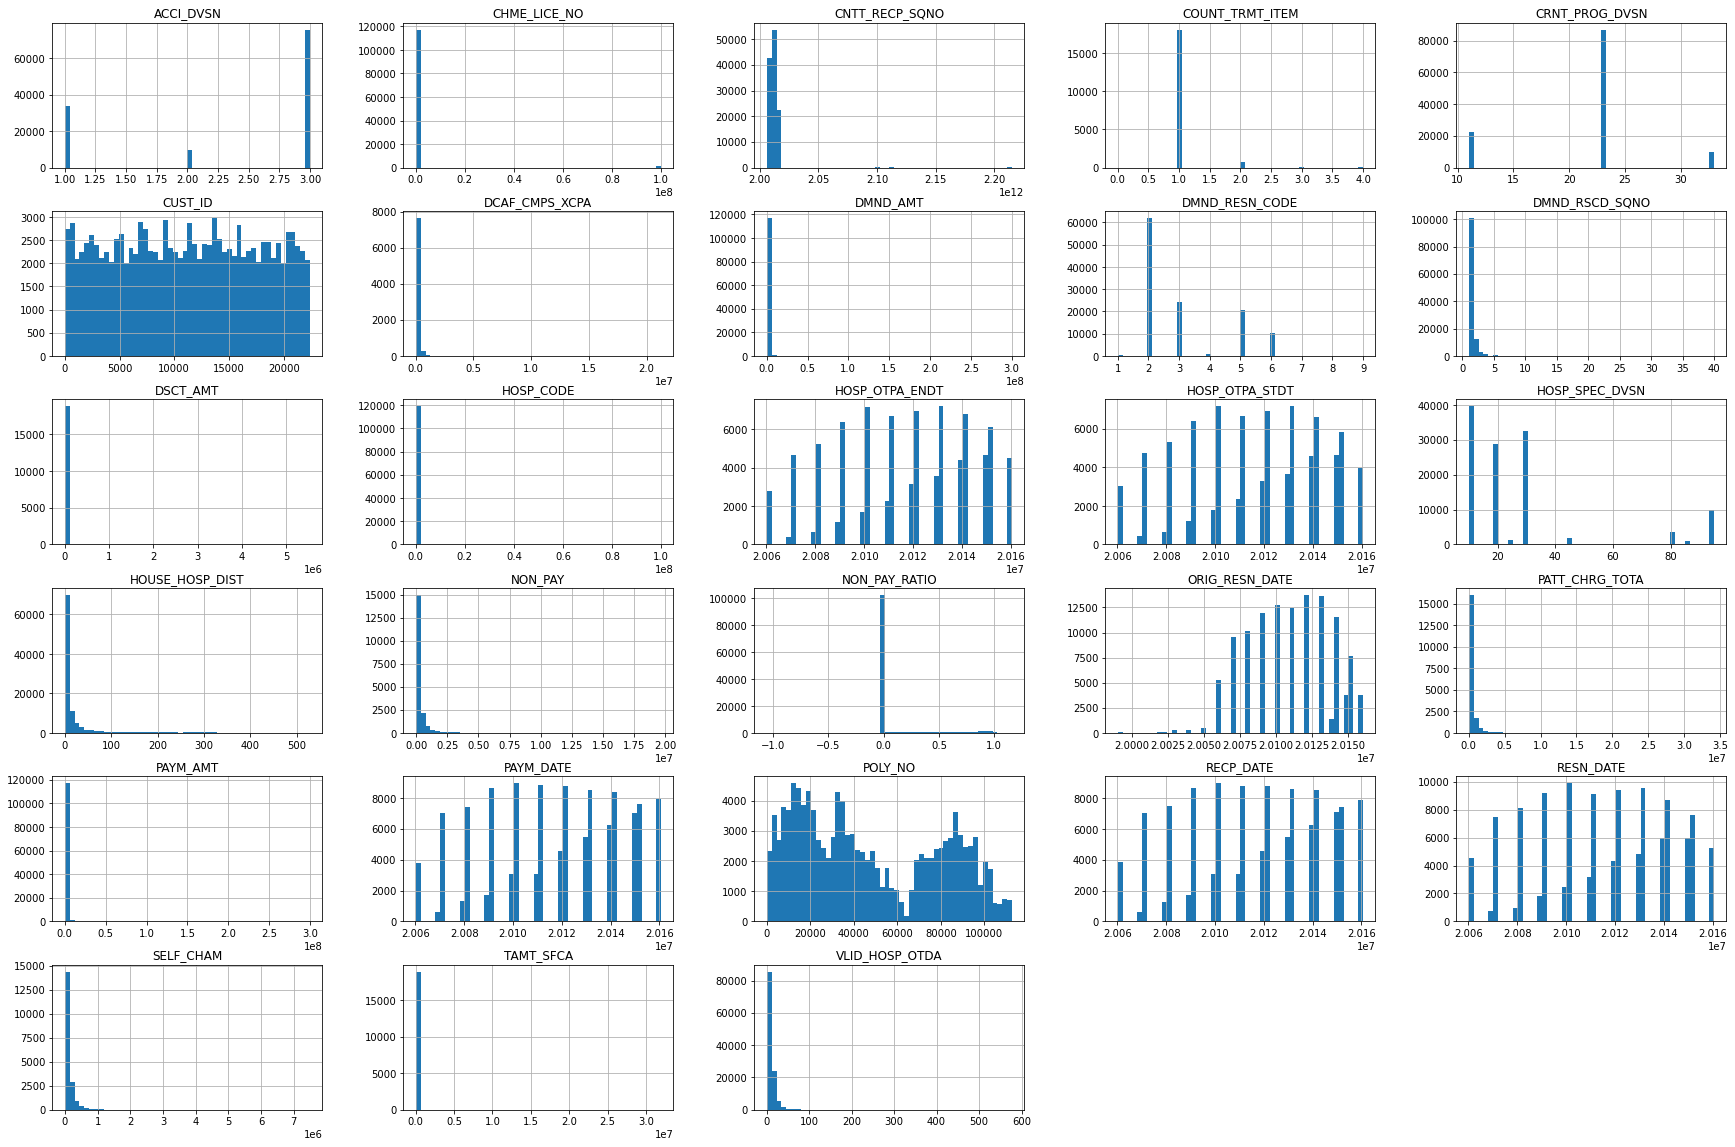

In [24]:
claim.hist(bins=50, figsize=(30,20))
plt.show()


### 결측치 분포 확인

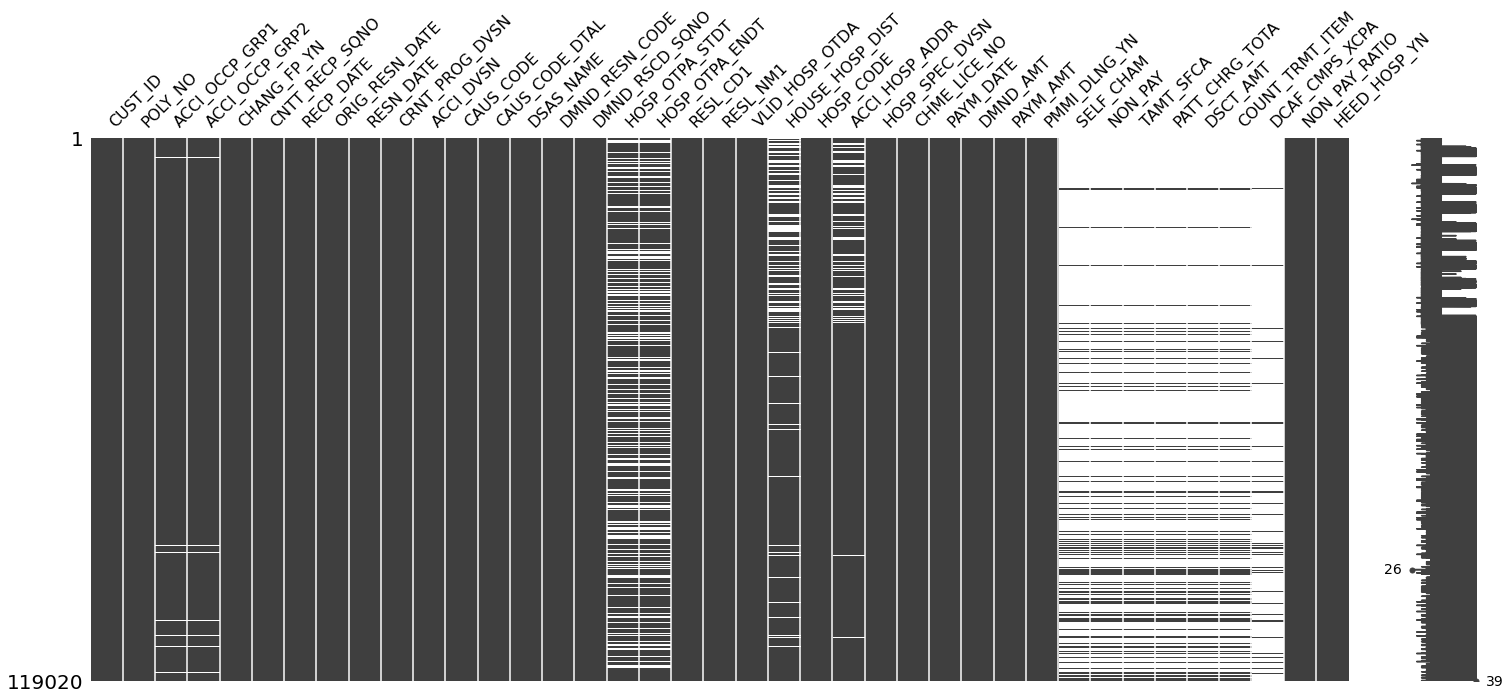

In [25]:
missingno.matrix(claim)
plt.show()


### 변수별 정보 확인

In [26]:
# 금감원 유의 병원 대상 여부
claim['HEED_HOSP_YN'].value_counts()


N    115685
Y      3335
Name: HEED_HOSP_YN, dtype: int64

In [27]:
# 유의 병원의 의사 라이센스 번호 체크
claim[claim['HEED_HOSP_YN'] == 'Y']['CHME_LICE_NO'].value_counts()


4109     171
10952     62
4925      61
25697     59
2830      56
        ... 
780        1
23266      1
11643      1
11015      1
5003       1
Name: CHME_LICE_NO, Length: 830, dtype: int64

In [28]:
# 많은 claim을 요청했을수록 보험 사기자일 확률이 높음
claim['CUST_ID'].value_counts()[claim['CUST_ID'].value_counts() > 50]


15109    98
13477    93
371      93
12678    91
1737     90
1893     90
540      88
6797     88
501      87
20828    87
18887    87
13990    84
4819     84
13432    82
11807    82
8971     81
21540    80
15701    74
15070    72
20122    71
9373     71
6236     70
2031     68
3720     68
10625    68
9123     67
14425    67
9568     66
1800     65
1005     64
1962     64
3716     62
9258     62
10408    61
11197    61
10221    61
15010    60
13925    59
5225     58
13396    58
525      57
10136    57
13644    57
15964    56
14629    56
2264     56
7956     56
21575    55
13408    55
5892     55
19489    54
19390    54
21171    54
7253     54
4567     54
11351    54
302      53
904      51
7173     51
7240     51
Name: CUST_ID, dtype: int64

In [29]:
cust[cust['CUST_ID']==15109]


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
16871,15109,1,Y,1,57,18445,12.0,N,200404.0,인천,2.자영업,자영업,18094762.0,NaN,NaN,Y,2.자영업,3차산업 종사자,1.0,34.0,NaN,NaN,4372.0,6125,8448.0


In [30]:
cust[cust['CUST_ID']==7240]


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
5224,7240,1,N,1,59,17222,20.0,N,NaN,NaN,NaN,NaN,20111625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200305.0,300000.0,NaN,7851,NaN


# Feature Engineering

## CUST_DATA 전처리
    

- AGE 관련 변수 연령대로 변환
- LTBN_CHLD_AGE변수 연령대로 변환
- MATE_OCCP_GRP_2 삭제
- DATE 관련 열 삭제
- 직업/나이 고려해서 CUST_INCM 결측치 채우기
- 직업 기준으로 JPBASE_HSHD_INCM 결측치 채우기
- RESI_TYPECODE, CTPR 결측치 최빈값으로 채우기
- WEDD_YN 결측치 N으로 채우기
- LTBN_CHLD_AGE, CHLD_CNT, TOTALPREM, MAX_PRM 결측치 0으로 채우기
- 분석에 유의미하지 않다고 판단하는 열(FP_CAREER) 삭제
- 카테고리 변수 원 핫 인코딩
- RESI_COST, TOTALPREM, MAX_PRM, CUST_INCM, RCBASE_HSHD_INCM, JPBASE_HSHD_INCM변수 정규화

### 나이 관련 변수(AGE, LTBN_CHILD_AGE)를 연령대로 변환

In [31]:
cust['AGE'] = cust['AGE'].map(lambda x: int(x//10))
cust['LTBN_CHLD_AGE'] = cust['LTBN_CHLD_AGE'].map(lambda x: x//10)
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


### OCCP_GRP_2변수 삭제

In [32]:
cust.drop('OCCP_GRP_2', axis=1, inplace=True)


### OCCP_GPR_1 변수에서 코드번호 삭제

In [33]:
set(cust.OCCP_GRP_1)


{'1.주부', '2.자영업', '3.사무직', '4.전문직', '5.서비스', '6.제조업', '7.1차산업', '8.기타', nan}

In [34]:
cust['OCCP_GRP_1'] = cust['OCCP_GRP_1'].map(lambda x : str(x)[2:])
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,서비스,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,자영업,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,자영업,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


### MATE_OCCP_GPR_2 변수 삭제

In [35]:
cust.drop('MATE_OCCP_GRP_2', axis=1, inplace=True)


### MATE_OCCP_GRP_1 변수에서 코드번호 삭제

In [36]:
set(cust.MATE_OCCP_GRP_1)


{'1.주부', '2.자영업', '3.사무직', '4.전문직', '5.서비스', '6.제조업', '7.1차산업', '8.기타', nan}

In [37]:
cust['MATE_OCCP_GRP_1'] = cust['MATE_OCCP_GRP_1'].map(lambda x : str(x)[2:])
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,사무직,146980441.0,NaN,NaN,Y,사무직,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,사무직,94600109.0,1.0,6.0,Y,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,서비스,18501269.0,NaN,NaN,N,n,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,자영업,317223657.0,2.0,99.0,N,n,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,자영업,10506072.0,8.0,8.0,Y,사무직,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


### Date관련 변수 삭제

In [38]:
cust.drop(['CUST_RGST', 'MAX_PAYM_YM'], axis=1, inplace=True)
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,NaN,NaN,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,1.0,6.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,NaN,NaN,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,2.0,99.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,8.0,8.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


### NULL값 확인 및 전처리

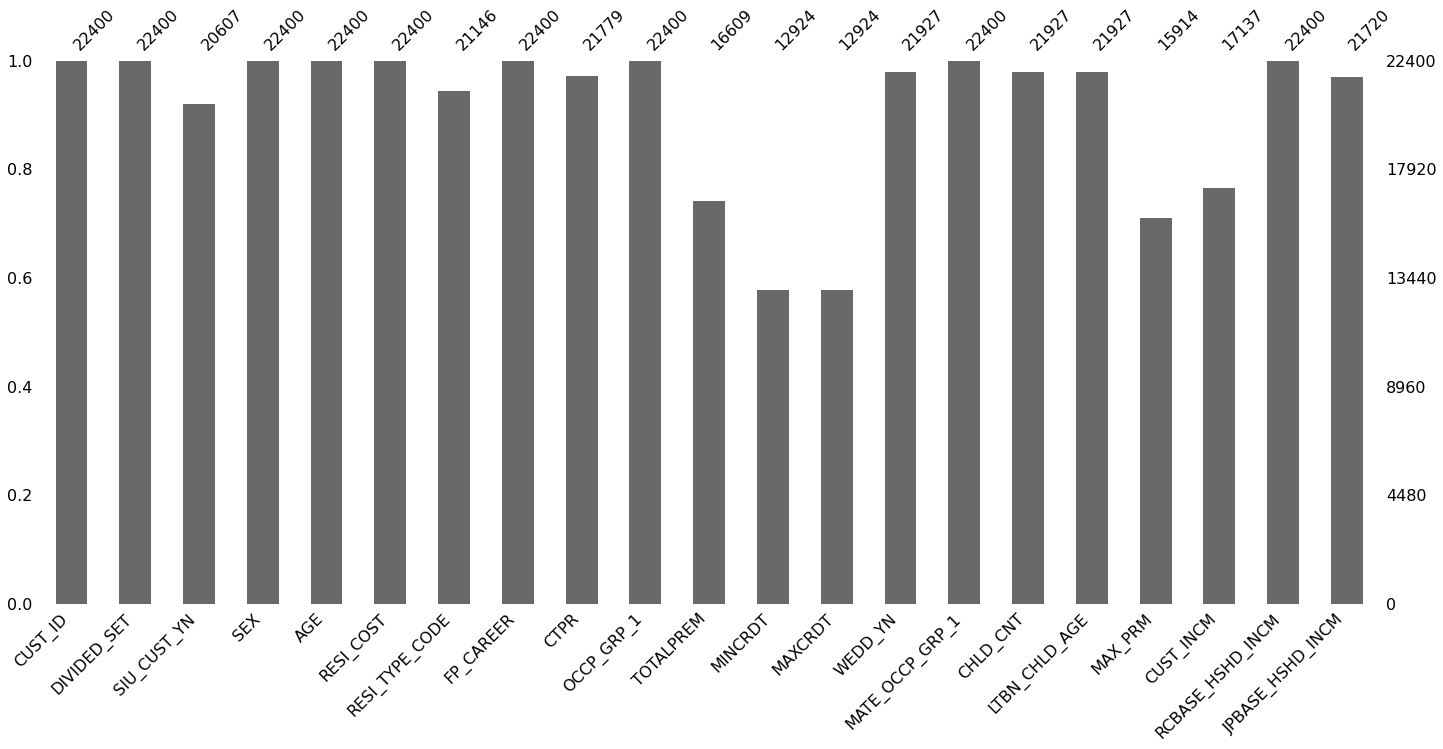

In [39]:
missingno.bar(cust)
plt.show()


In [40]:
cust.isnull().sum()


CUST_ID                0
DIVIDED_SET            0
SIU_CUST_YN         1793
SEX                    0
AGE                    0
RESI_COST              0
RESI_TYPE_CODE      1254
FP_CAREER              0
CTPR                 621
OCCP_GRP_1             0
TOTALPREM           5791
MINCRDT             9476
MAXCRDT             9476
WEDD_YN              473
MATE_OCCP_GRP_1        0
CHLD_CNT             473
LTBN_CHLD_AGE        473
MAX_PRM             6486
CUST_INCM           5263
RCBASE_HSHD_INCM       0
JPBASE_HSHD_INCM     680
dtype: int64

In [41]:
# NULL값이 많은 MINCRDT, MAXCRDT제거
cust.drop(['MINCRDT', 'MAXCRDT'], axis=1, inplace=True)
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


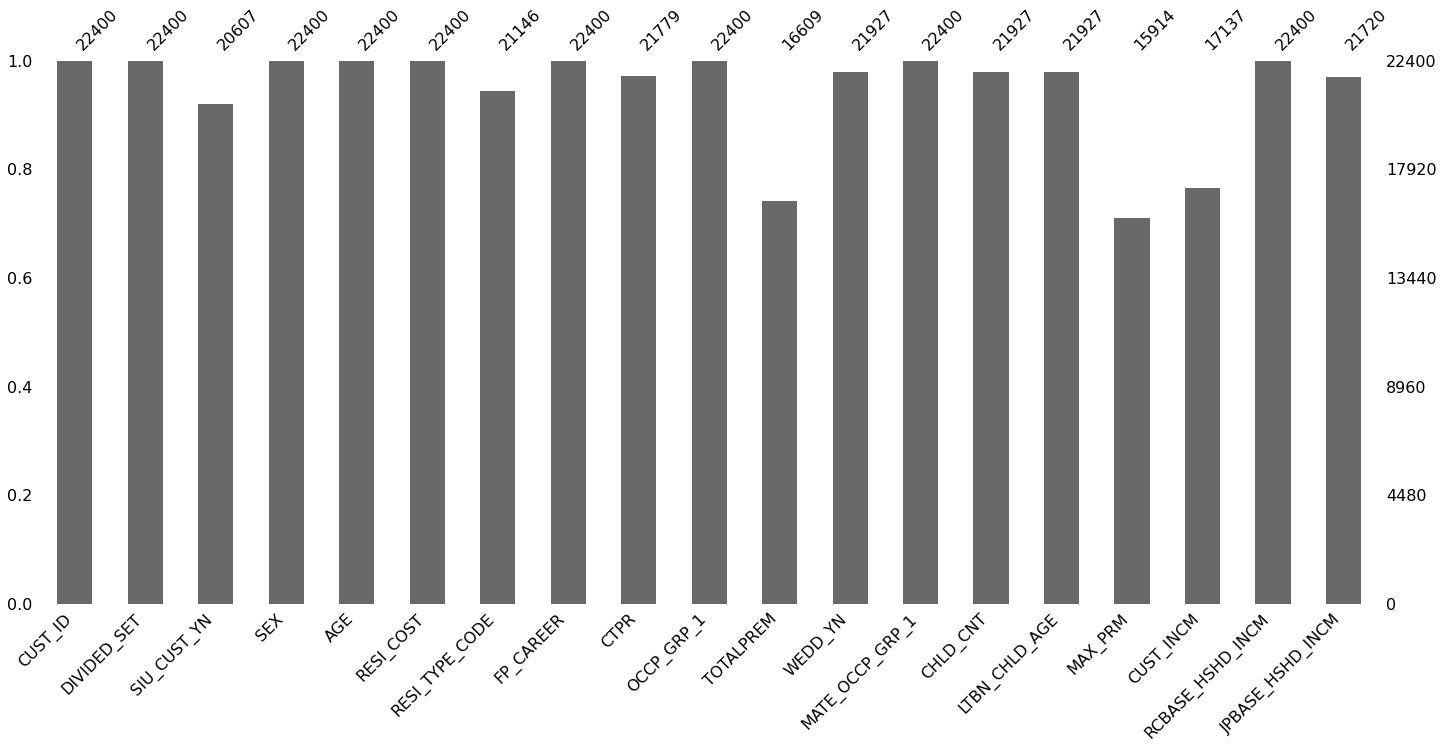

In [42]:
missingno.bar(cust)
plt.show()

In [43]:
# 개인소득 결측치 전처리
#CUST_INCM은 고객의 연령/직업/보험료 수준 등을 통해 추정한다.
cust[cust.CUST_INCM.isnull()].head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
5,6,1,N,1,6,6218,99.0,N,충남,사무직,22313040.0,Y,주부,1.0,3.0,82850.0,NaN,0,6449.0
10,13,1,Y,1,6,8140,50.0,N,경기,제조업,33261687.0,Y,서비스,0.0,0.0,483850.0,NaN,4066,NaN
13,17,1,N,1,6,14027,20.0,N,대구,서비스,10122595.0,Y,주부,0.0,0.0,229500.0,NaN,4538,5869.0
15,19,1,N,1,6,15833,20.0,N,경기,자영업,11323581.0,Y,주부,1.0,3.0,300000.0,NaN,5075,6120.0


In [44]:
occp_age_cust = cust.pivot_table(index=['AGE', 'OCCP_GRP_1'], values='CUST_INCM', aggfunc="mean")
occp_age_cust.head()


CUST_INCM
AGE OCCP_GRP_1             
2   1차산업        3208.333333
    n           2487.000000
    기타            10.167982
    사무직         2740.725979
    서비스         2773.720000

In [45]:
occp_age_cust["CUST_INCM"]


AGE  OCCP_GRP_1
2    1차산업          3208.333333
     n             2487.000000
     기타              10.167982
     사무직           2740.725979
     서비스           2773.720000
     자영업           2931.117647
     전문직           2761.718750
     제조업           2812.219512
     주부               0.000000
3    1차산업          3474.411765
     n             3534.750000
     기타             220.549828
     사무직           3571.076851
     서비스           3590.325167
     자영업           3954.316076
     전문직           3604.069243
     제조업           3569.818966
     주부               0.000000
4    1차산업          3969.931818
     n             4204.710526
     기타            2731.950000
     사무직           4673.625914
     서비스           4157.223301
     자영업           4723.804674
     전문직           4455.028694
     제조업           4291.350000
     주부               0.000000
5    1차산업          4145.708738
     n             4627.300000
     기타            3363.211429
     사무직           5502.984463
     서비스           4080

In [46]:
def fill_income(row):
    try:
        avg_income = occp_age_cust["CUST_INCM"][row.AGE][row.OCCP_GRP_1]
    except:
        avg_income = 0
    return avg_income


In [47]:
cust["CUST_INCM_NEW"] = None
cust["CUST_INCM_NEW"][cust.CUST_INCM.isnull()] = \
cust[cust.CUST_INCM.isnull()].apply(fill_income, axis=1)


C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


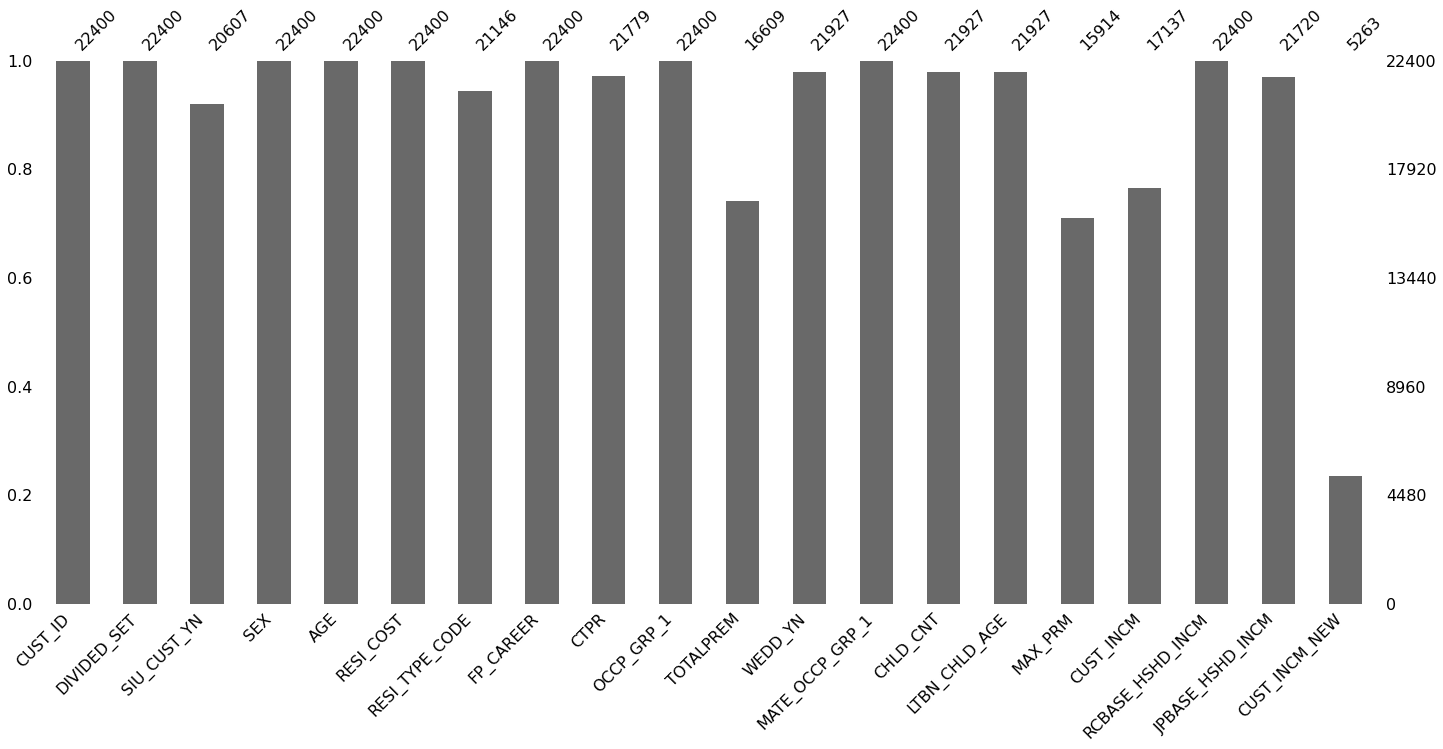

In [48]:
missingno.bar(cust)
plt.show()


In [49]:
cust["CUST_INCM"][cust.CUST_INCM.isnull()] = \
cust[cust.CUST_INCM.isnull()].apply(fill_income, axis=1)
del cust["CUST_INCM_NEW"]


C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
cust.head(10)


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.000000,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.000000,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.000000,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,4813.837838,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.000000,0,8885.0
5,6,1,N,1,6,6218,99.0,N,충남,사무직,22313040.0,Y,주부,1.0,3.0,82850.0,5403.133333,0,6449.0
6,7,1,Y,2,6,11388,30.0,N,서울,서비스,46522197.0,Y,n,1.0,2.0,482077.0,3611.000000,0,3611.0
7,8,1,N,1,5,86527,20.0,Y,서울,자영업,151085847.0,Y,자영업,1.0,2.0,10283415.0,6465.000000,12219,12063.0
8,9,1,N,1,5,22638,20.0,N,서울,전문직,3666050.0,Y,전문직,1.0,1.0,29.0,4975.000000,7553,9821.0
9,12,1,N,1,5,37222,20.0,N,서울,전문직,135719262.0,Y,전문직,2.0,2.0,724768.0,8780.000000,10466,13858.0


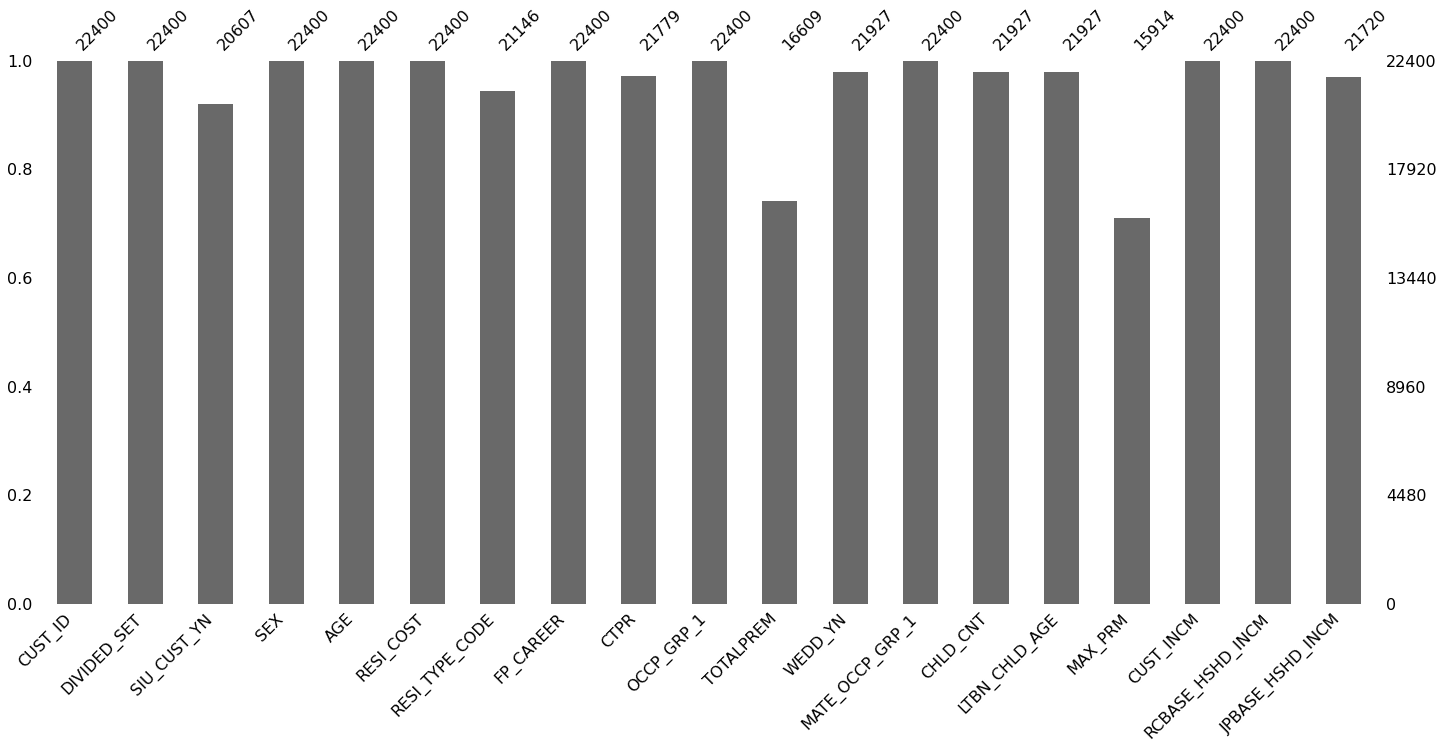

In [51]:
missingno.bar(cust)
plt.show()

In [52]:
# 가구소득 결측치 처리
# 직업별 가구 평균 소득 계산
avg_income_by_job = cust.pivot_table(index=["OCCP_GRP_1"], values=["JPBASE_HSHD_INCM"], aggfunc="mean")
avg_income_by_job


,JPBASE_HSHD_INCM
OCCP_GRP_1,
1차산업,4256.579937
n,4807.235294
기타,4379.457519
사무직,5529.133980
서비스,5464.250453
자영업,6466.752099
전문직,5979.159369
제조업,5403.936282
주부,4744.600627


In [53]:
def fill_jbbase_income(row):
    try:
        avg_jpbase = jpbase_df["JPBASE_HSHD_INCM"][row.OCCP_GRP_1]
    except:
        avg_jpbase = 0
    return avg_jpbase


In [54]:
cust["JPBASE_HSHD_INCM_NEW"] = None
cust["JPBASE_HSHD_INCM_NEW"][cust.JPBASE_HSHD_INCM.isnull()] = \
cust[cust.JPBASE_HSHD_INCM.isnull()].apply(fill_jbbase_income, axis=1)


C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


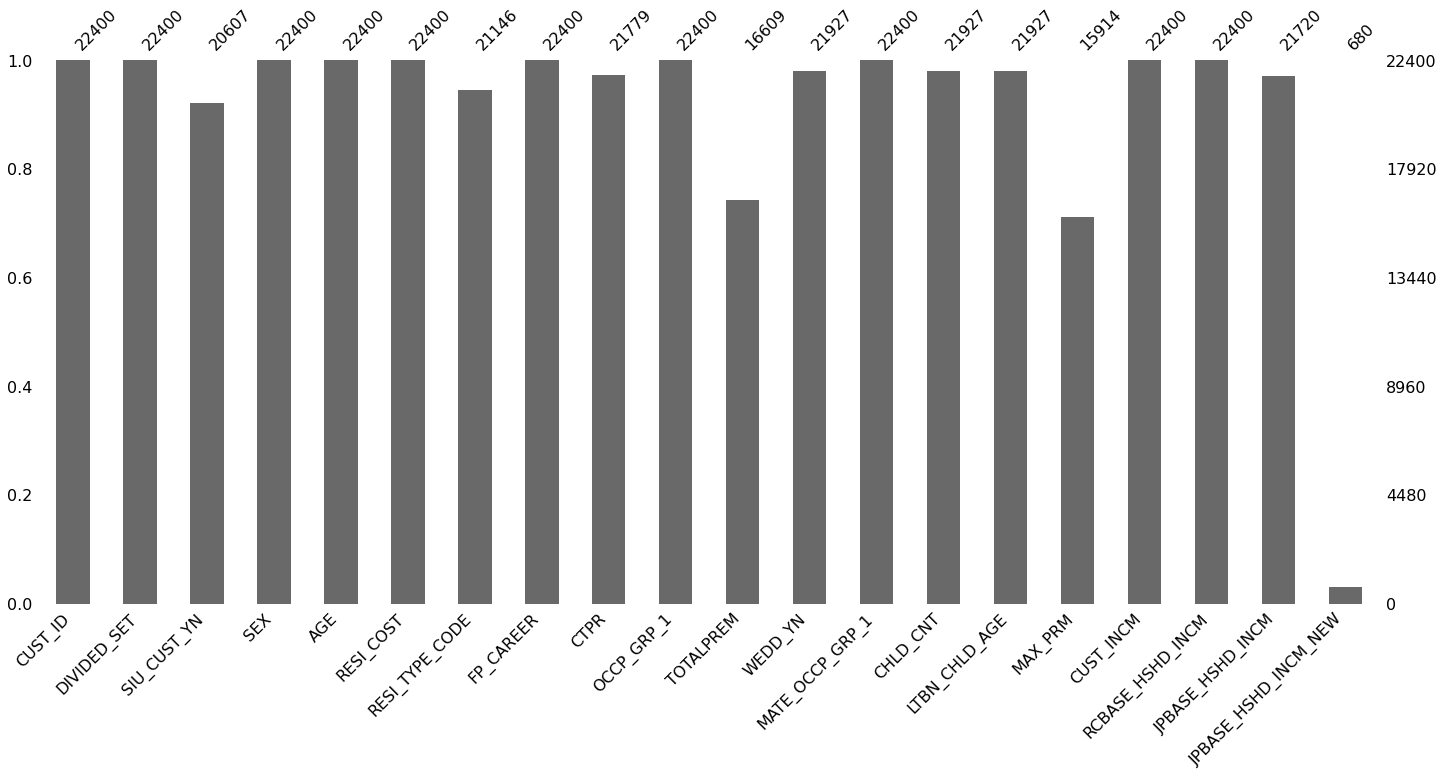

In [55]:
missingno.bar(cust)
plt.show()


In [56]:
cust["JPBASE_HSHD_INCM"][cust.JPBASE_HSHD_INCM.isnull()] = \
cust[cust.JPBASE_HSHD_INCM.isnull()].apply(fill_jbbase_income, axis=1)
del cust["JPBASE_HSHD_INCM_NEW"]


C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


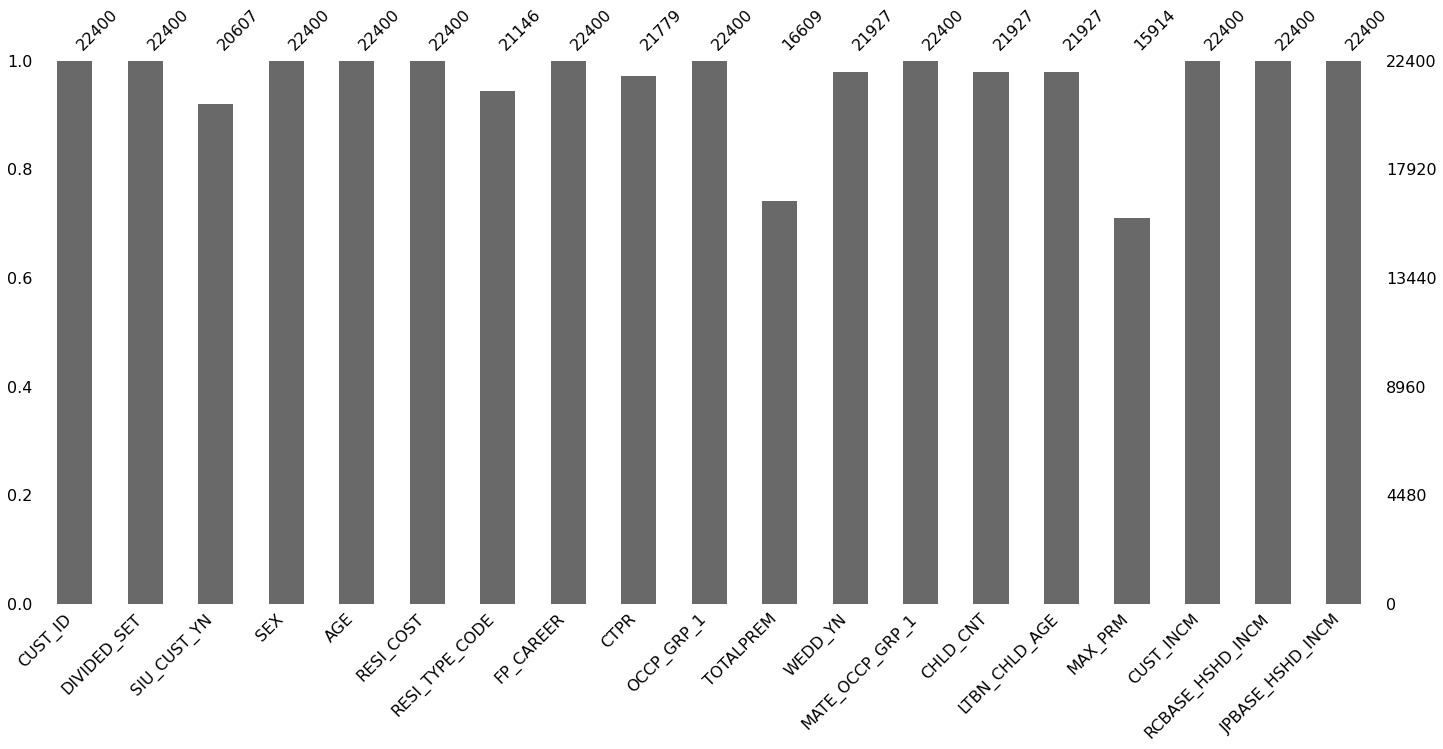

In [57]:
missingno.bar(cust)
plt.show()


In [58]:
# 기타 변수 결측치 처리
cust["RESI_TYPE_CODE"].value_counts()


20.0    10677
12.0     2549
30.0     2379
11.0     1797
40.0     1432
99.0     1341
13.0      816
50.0       69
60.0       55
70.0       31
Name: RESI_TYPE_CODE, dtype: int64

In [59]:
# RESI_TYPE_CODE, CTPR 결측치는 최빈값으로 설정
cust['RESI_TYPE_CODE'].fillna(20, inplace=True)
cust['CTPR'].fillna('경기', inplace=True)


In [60]:
# WEDD_YN 결측치는 N으로 설정
cust['WEDD_YN'].fillna('N', inplace=True)


In [61]:
# LTBN_CHILD_AGE, CHLD_CNT, TOTALPREM, MAX_PRM 결측치는 0으로 설정
cust['LTBN_CHLD_AGE'].fillna('0', inplace=True)
cust['CHLD_CNT'].fillna('0', inplace=True)
cust['TOTALPREM'].fillna('0', inplace=True)
cust['MAX_PRM'].fillna('0', inplace=True)


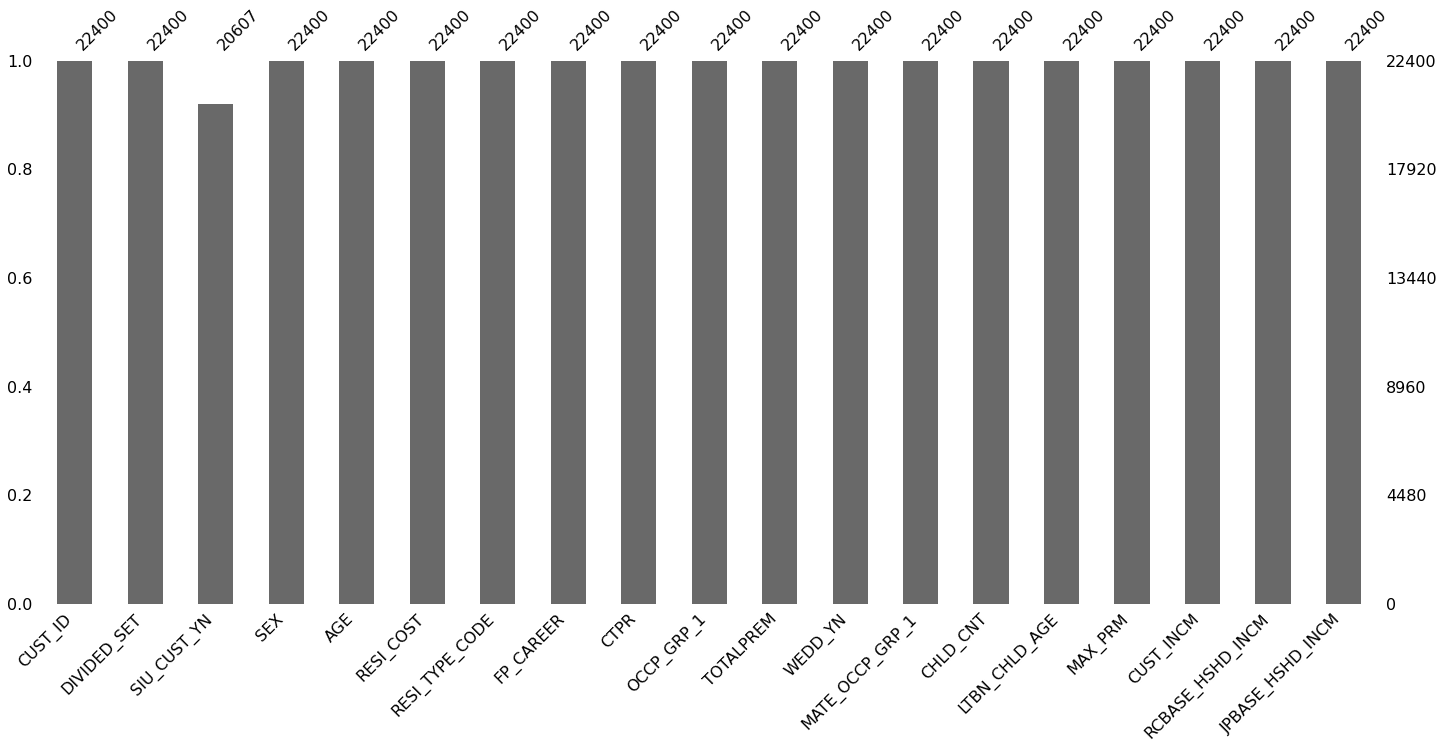

In [62]:
missingno.bar(cust)
plt.show()


### 분석에 유의미하지 않다고 판단하는 열 삭제

In [63]:
cust.drop("FP_CAREER", axis=1, inplace=True)
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,충북,사무직,1.4698e+08,Y,사무직,2,1,319718,4879.000000,10094,11337.0
1,2,1,N,1,5,40000,20.0,서울,사무직,9.46001e+07,Y,주부,2,1,341341,6509.000000,9143,6509.0
2,3,1,N,1,6,0,20.0,서울,서비스,1.85013e+07,N,n,0,0,131300,4180.000000,0,4180.0
3,4,1,N,2,6,12861,40.0,경기,자영업,3.17224e+08,N,n,0,0,1.49318e+06,4813.837838,4270,5914.0
4,5,1,N,2,5,0,20.0,광주,자영업,1.05061e+07,Y,사무직,3,1,166760,3894.000000,0,8885.0


### 카테고리변수 원 핫 인코딩

In [64]:
category = ["SEX", "RESI_TYPE_CODE", "CTPR", "OCCP_GRP_1", "WEDD_YN", "MATE_OCCP_GRP_1"]
dummy = pd.get_dummies(cust, columns=category)
dummy.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부
0,1,1,N,4,21111,1.4698e+08,2,1,319718,4879.000000,10094,11337.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1,N,5,40000,9.46001e+07,2,1,341341,6509.000000,9143,6509.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,3,1,N,6,0,1.85013e+07,0,0,131300,4180.000000,0,4180.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,4,1,N,6,12861,3.17224e+08,0,0,1.49318e+06,4813.837838,4270,5914.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,5,1,N,5,0,1.05061e+07,3,1,166760,3894.000000,0,8885.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


### CUST_DATA 전처리 완료 후 저장

In [65]:
dummy.to_csv("CUST_DATA_FE_1.csv", index=False, encoding="utf-8-sig")
del dummy


## CLAIM_DATA 전처리 및 파생변수 만들기

- 결측치가 많은 변수 삭제 및 DATE관련 변수 삭제
- HOST_DAYS: 각 고객별 평균 입원 일수
- HEED_HOSP: 각 고객별 유의병원 출입여부
- CLAIM_COUNT: 각 고객별 청구 횟수
- DOC_SIU_RATIO: 담당의사의 사기비율 max(사기수/전체청구수)
- HOSP_SIU_RATIO: 병원의 사기비율 max(사기수/전체청구수)
- HOSP_DOCSIU: DOC_SIU_RATIO * HOSP_SIU_RATIO
- ACCI_RATIO: ACCI_DVSN 별 / CLAIM_COUNT
- 사고원인(ACCI_DVSN)과 청구코드(DMND_RESN_CODE)를 이용한 파생변수

In [66]:
cust = pd.read_csv("CUST_DATA_FE_1.csv", encoding="utf-8-sig")
claim = pd.read_csv("CLAIM_DATA.csv", encoding="utf-16")


In [67]:
claim.head()


,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,ACCI_DVSN,CAUS_CODE,CAUS_CODE_DTAL,DSAS_NAME,DMND_RESN_CODE,DMND_RSCD_SQNO,HOSP_OTPA_STDT,HOSP_OTPA_ENDT,RESL_CD1,RESL_NM1,VLID_HOSP_OTDA,HOUSE_HOSP_DIST,HOSP_CODE,ACCI_HOSP_ADDR,HOSP_SPEC_DVSN,CHME_LICE_NO,PAYM_DATE,DMND_AMT,PAYM_AMT,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
0,5936,1365,8.기타,학생,Y,2006011200001,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,20000,20000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
1,5936,6151,8.기타,학생,Y,2006011200002,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,30000,30000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
2,5936,10364,8.기타,학생,Y,2006011200003,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,40000,40000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
3,1043,1247,1.주부,주부,N,2006011200004,20060112,20060105,20060105,23,3,A09,#,기타세균성창자감염|손목및손의2도화상|피부염,2,1,20060105.0,20060110.0,A09,감염성 및 상세불명 기원의 기타위장염 및 결장염,6,NaN,12537.0,NaN,95.0,17647,20060113.0,60000,60000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
4,8545,11236,1.주부,주부,Y,2006011200005,20060112,20060110,20060110,11,3,I83,#,좌측하지정맥류혈관발거술|레이저소작술,5,1,NaN,NaN,I83,다리(하지)의 정맥류,0,4.88,2305.0,경기,30.0,25697,20060112.0,200000,200000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N


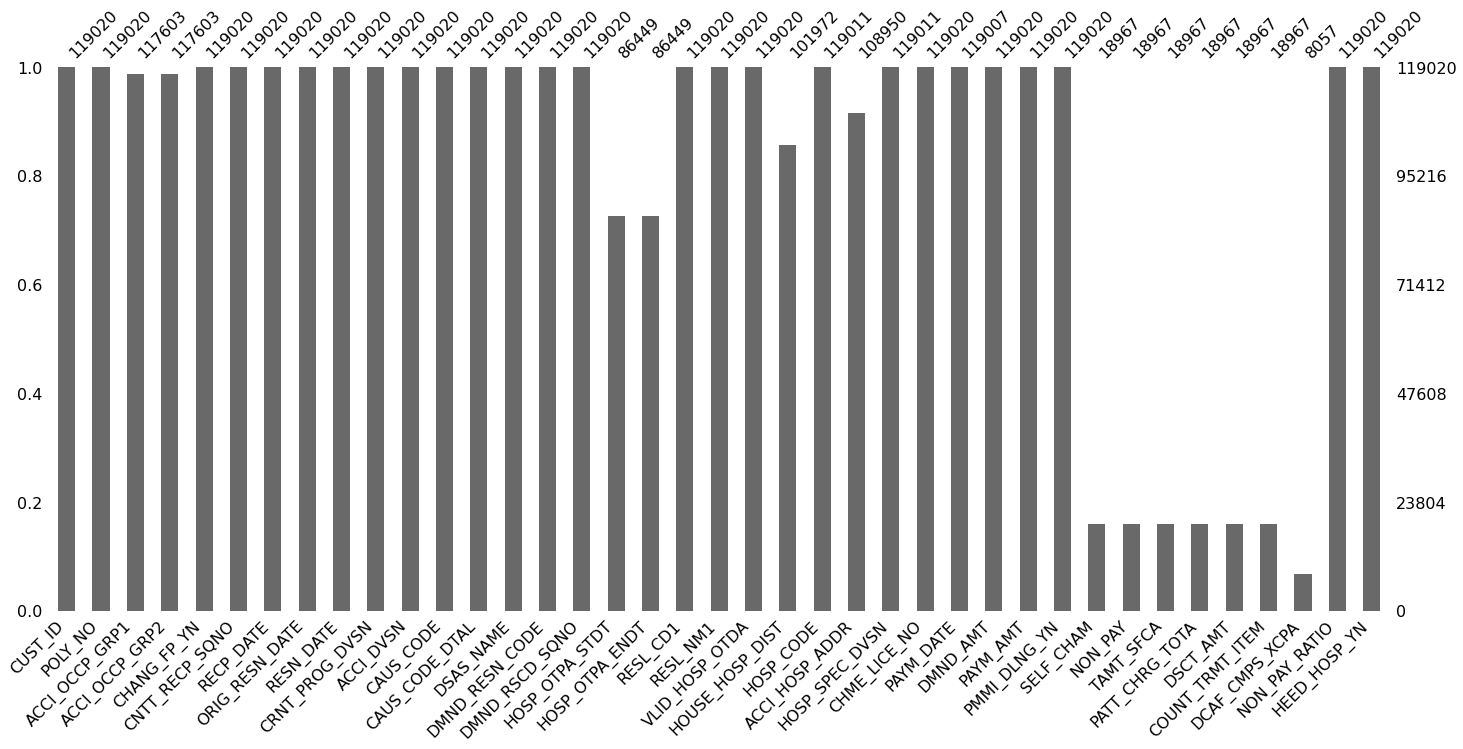

In [68]:
missingno.bar(claim)
plt.show()


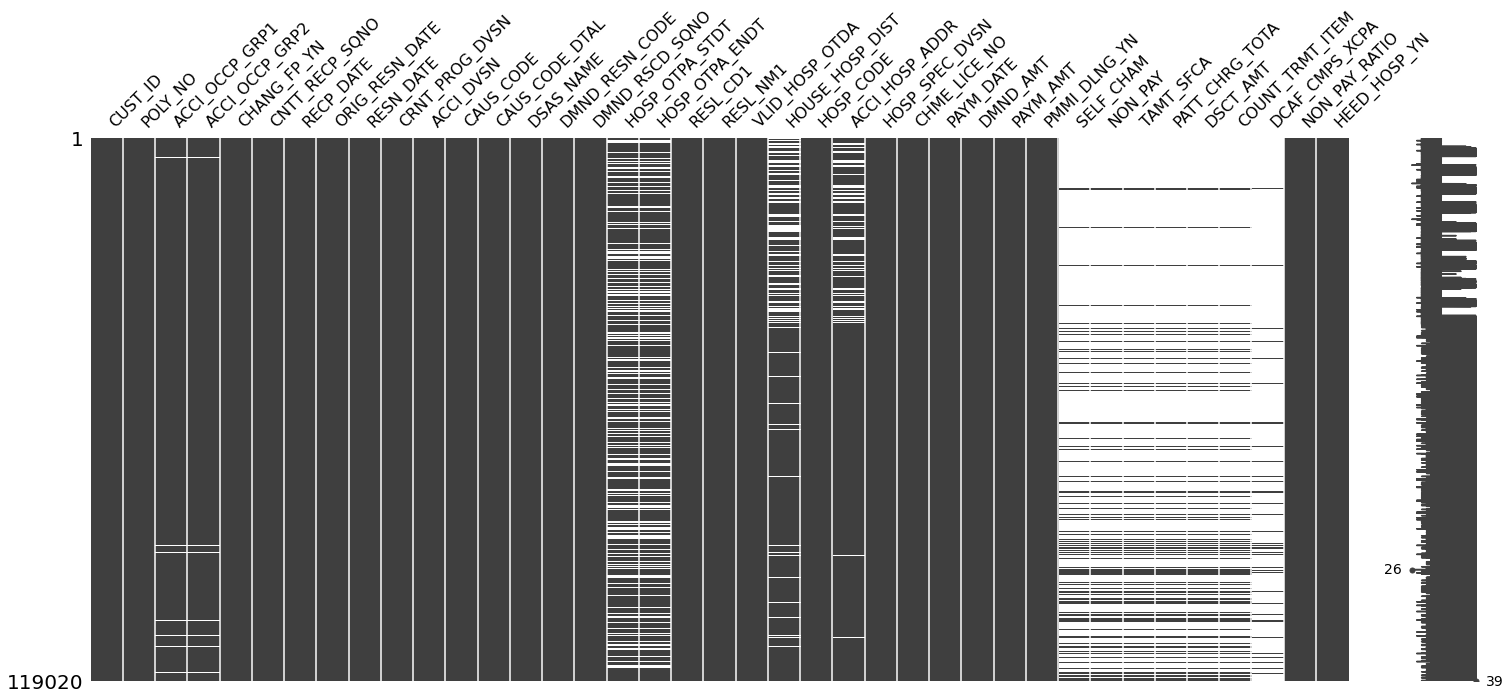

In [69]:
missingno.matrix(claim)
plt.show()


### 결측치가 많은 변수 삭제 및 날짜 관련 변수 삭제

In [70]:
# NULL값이 많은 변수 삭제
claim.drop(['SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT', 'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA'], axis=1, inplace=True)


In [71]:
# DATE 변수 삭제
claim.drop(['HOSP_OTPA_STDT', 'HOSP_OTPA_ENDT'], axis=1, inplace=True)


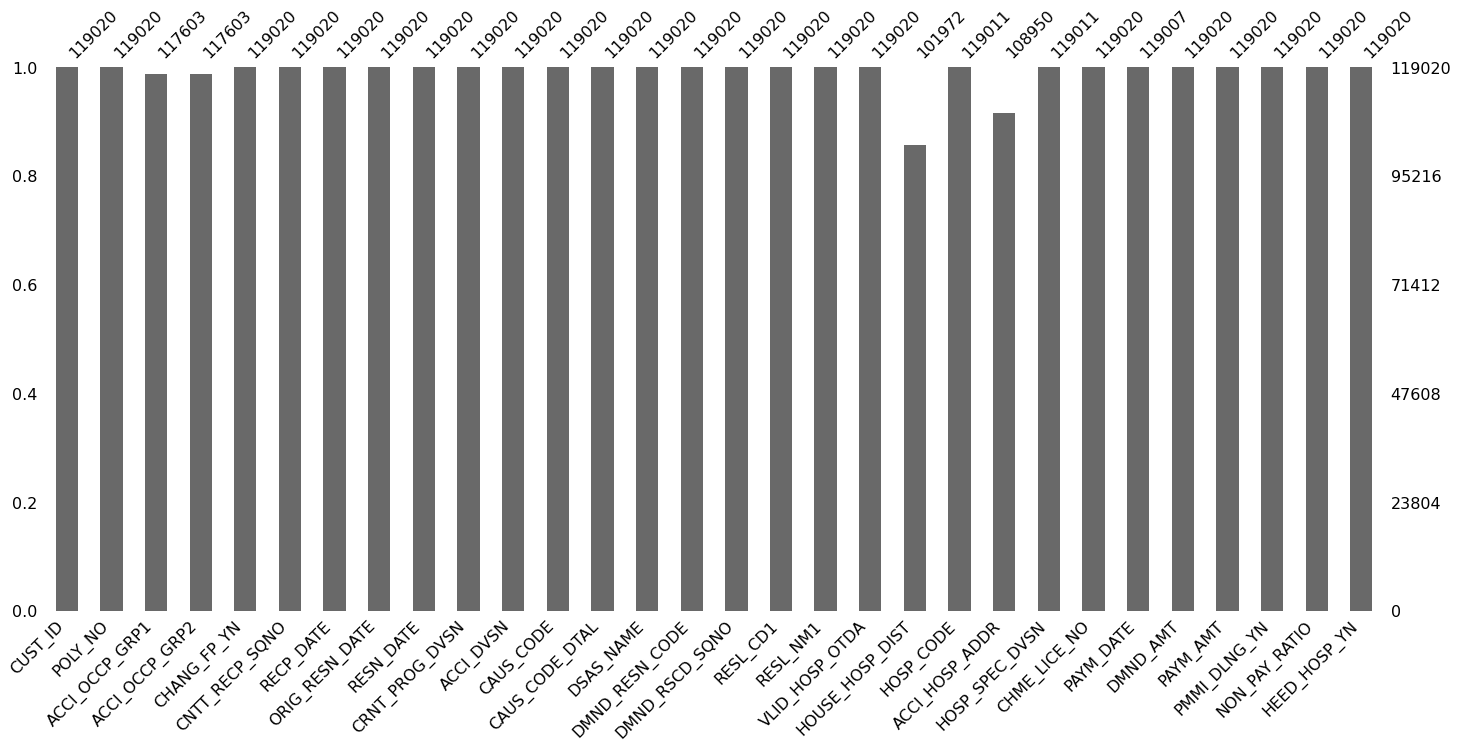

In [72]:
missingno.bar(claim)
plt.show()


### 파생변수1: HOST_DAYS: 각 고객별 평균 입원 일수

In [73]:
claim_df = claim.pivot_table(index='CUST_ID', values='VLID_HOSP_OTDA', aggfunc='mean')
claim_df.reset_index(inplace=True)
cust=pd.merge(cust, claim_df, how='left', on='CUST_ID')
cust.rename(columns={"VLID_HOSP_OTDA": "HOSP_DAYS"}, inplace=True)


In [74]:
cust[["CUST_ID","HOSP_DAYS"]].head()


,CUST_ID,HOSP_DAYS
0,1,1.250000
1,2,2.666667
2,3,16.000000
3,4,0.000000
4,5,25.000000


### 파생변수2: HEED_HOSP: 각 고객별 유의병원 출입여부

In [75]:
id_heed = claim[claim['HEED_HOSP_YN']=='Y']['CUST_ID'].unique()
id_heed


array([15218,  2657, 19568, ...,  7768,  3853, 17945], dtype=int64)

In [76]:
cust['HEED_HOSP'] = np.nan
cust['HEED_HOSP'][cust['CUST_ID'].isin(id_heed)] = 1
cust['HEED_HOSP'].fillna(0, inplace=True)
cust['HEED_HOSP'].value_counts()


C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0    21224
1.0     1176
Name: HEED_HOSP, dtype: int64

### 파생변수3: CLAIM_COUNT: 각 고객별 청구 횟수

In [77]:
cl_count = claim.pivot_table(index='CUST_ID', values='POLY_NO', aggfunc='count').reset_index()
cl_count.columns = ['CUST_ID', 'CLAIM_COUNT']
cust = pd.merge(cust, cl_count, on='CUST_ID', how='left')


### 파생변수4: DOC_SIU_RATIO: 담당의사의 사기비율

In [78]:
# 의사별 사기수 / 전체 청구수
data = pd.merge(claim, cust[['CUST_ID', 'SIU_CUST_YN']], how='left', on='CUST_ID')

doc_polyno = data.pivot_table(index=['CHME_LICE_NO'], values='POLY_NO', aggfunc='count').reset_index()    # 의사전체의 청약서번호 또는 보험 계약을 한 사람의 번호
doc_YN = data.pivot_table(index=['CHME_LICE_NO', 'SIU_CUST_YN'], values='POLY_NO', aggfunc='count').reset_index()    # 의사 중 일반인과 사기자의 청약서번호 또는 보험 계약을 한 사람의 번호
doc_YN = doc_YN[doc_YN['SIU_CUST_YN']=='Y']
doc_polyno = pd.merge(doc_polyno, doc_YN, how='left', on='CHME_LICE_NO')
doc_polyno['DOC_SIU_RATIO'] = doc_polyno['POLY_NO_y']/doc_polyno['POLY_NO_x']
doc_polyno.fillna(0, inplace=True)
d_siu_ratio = doc_polyno[['CHME_LICE_NO', 'DOC_SIU_RATIO']]
d_siu_ratio.head(5)


,CHME_LICE_NO,DOC_SIU_RATIO
0,6,0.0
1,7,0.0
2,8,1.0
3,9,0.0
4,10,0.0


In [79]:
# CUST_ID별 의사 사기비율
df_lice = claim.pivot_table(index=['CUST_ID', 'CHME_LICE_NO'], values='POLY_NO', aggfunc='count').reset_index()
df_lice =pd.merge(data, d_siu_ratio, how='left', on='CHME_LICE_NO')
idlice_ratio = df_lice.pivot_table(index='CUST_ID', values='DOC_SIU_RATIO', aggfunc='max').reset_index()
idlice_ratio.head()


,CUST_ID,DOC_SIU_RATIO
0,1,0.101358
1,2,0.800000
2,3,0.000000
3,4,0.142857
4,5,0.176471


In [80]:
cust = pd.merge(cust, idlice_ratio, how='left', on='CUST_ID')
cust[["CUST_ID","HOSP_DAYS","CLAIM_COUNT","DOC_SIU_RATIO"]].head()


,CUST_ID,HOSP_DAYS,CLAIM_COUNT,DOC_SIU_RATIO
0,1,1.250000,4,0.101358
1,2,2.666667,3,0.800000
2,3,16.000000,1,0.000000
3,4,0.000000,9,0.142857
4,5,25.000000,1,0.176471


### 파생변수5: HOSP_SIU_RATIO: 병원별 사기비율

In [81]:
# 병원별 사기 수 / 전체 청구 수
hosp_count = data.pivot_table(index=['HOSP_CODE'], values= 'POLY_NO', aggfunc='count').reset_index()


In [82]:
hosp_YN = data.pivot_table(index=['HOSP_CODE', 'SIU_CUST_YN'], values= 'POLY_NO', aggfunc='count').reset_index()


In [83]:
hosp_YN = hosp_YN[hosp_YN['SIU_CUST_YN']=='Y']


In [84]:
hosp_count = pd.merge(hosp_count, hosp_YN, how='left', on='HOSP_CODE')


In [85]:
hosp_count['HOSP_SIU_RATIO'] = hosp_count['POLY_NO_y'] / hosp_count['POLY_NO_x']
hosp_count['POLY_NO_x']
hosp_count.fillna(0, inplace=True)
h_siu_ratio = hosp_count[['HOSP_CODE', 'HOSP_SIU_RATIO']]
h_siu_ratio.head(10)


,HOSP_CODE,HOSP_SIU_RATIO
0,2.0,0.741935
1,3.0,0.042308
2,4.0,0.129870
3,5.0,0.054054
4,6.0,0.076220
5,7.0,0.000000
6,8.0,0.007326
7,9.0,0.125000
8,10.0,0.048193
9,11.0,0.272727


In [86]:
# CUST_ID 별 병원 사기 비율 max
df_hosp = claim.pivot_table(index=['CUST_ID', 'HOSP_CODE',], values='POLY_NO', aggfunc='count').reset_index()


In [87]:
df_hosp = pd.merge(data, h_siu_ratio, how='left', on='HOSP_CODE')


In [88]:
idhosp_ratio = df_hosp.pivot_table(index='CUST_ID', values='HOSP_SIU_RATIO', aggfunc='max').reset_index()
idhosp_ratio.head()


,CUST_ID,HOSP_SIU_RATIO
0,1,0.200000
1,2,0.428571
2,3,0.000000
3,4,0.000000
4,5,0.354183


In [89]:
cust = pd.merge(cust, idhosp_ratio, how='left', on='CUST_ID')
cust[["CUST_ID","HOSP_SIU_RATIO"]].head()


,CUST_ID,HOSP_SIU_RATIO
0,1,0.200000
1,2,0.428571
2,3,0.000000
3,4,0.000000
4,5,0.354183


### 파생변수6: HOSP_DOC_SIU: 의사 사기 비율 * 병원 사기 비율

In [90]:
# 의사 사기비율 * 병원 사기 비율
cust['HOSP_DOC_SIU'] = cust['DOC_SIU_RATIO']*cust['HOSP_SIU_RATIO']
cust[['CUST_ID', 'DOC_SIU_RATIO', 'HOSP_SIU_RATIO', 'HOSP_DOC_SIU']].head()


,CUST_ID,DOC_SIU_RATIO,HOSP_SIU_RATIO,HOSP_DOC_SIU
0,1,0.101358,0.200000,0.020272
1,2,0.800000,0.428571,0.342857
2,3,0.000000,0.000000,0.000000
3,4,0.142857,0.000000,0.000000
4,5,0.176471,0.354183,0.062503


### 파생변수7: ACCI_RATIO: ACCI_DVSN 별 청구횟수

In [91]:
# 각 ACCI_DVSN / 청구횟수 비율
acci_claim = claim.pivot_table(index=['CUST_ID', 'ACCI_DVSN'], values='POLY_NO', aggfunc='count').unstack(1).reset_index()
acci_claim = acci_claim.values
acci_claim = pd.DataFrame(acci_claim)
acci_claim.fillna(0, inplace=True)
acci_claim.columns = ['CUST_ID', 'ACCI_RATIO_1', 'ACCI_RATIO_2', 'ACCI_RATIO_3']
acci_claim.head()


,CUST_ID,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3
0,1.0,0.0,0.0,4.0
1,2.0,0.0,0.0,3.0
2,3.0,0.0,1.0,0.0
3,4.0,9.0,0.0,0.0
4,5.0,0.0,1.0,0.0


In [92]:
cust = pd.merge(cust, acci_claim, on='CUST_ID', how='left')
cust['ACCI_RATIO_1'] = cust['ACCI_RATIO_1']/cust['CLAIM_COUNT']
cust['ACCI_RATIO_2'] = cust['ACCI_RATIO_2']/cust['CLAIM_COUNT']
cust['ACCI_RATIO_3'] = cust['ACCI_RATIO_3']/cust['CLAIM_COUNT']
cust[['CUST_ID', 'ACCI_RATIO_1', 'ACCI_RATIO_2', 'ACCI_RATIO_3']].head()


,CUST_ID,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3
0,1,0.0,0.0,1.0
1,2,0.0,0.0,1.0
2,3,0.0,1.0,0.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


### 파생변수8: 사고원인(ACCI_DVSN)과 청구코드(DMND_RESN_CODE)를 이용한 파생변수

In [93]:
claim_acci = claim[['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE']]
claim_acci["value"] = 1
cust_claim_df = claim_acci.pivot_table(index=['CUST_ID'], columns=['ACCI_DVSN', 'DMND_RESN_CODE'], values=['value'], aggfunc='count', fill_value=0)


C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
cust_claim_df.head()


value                                                           \
ACCI_DVSN          1                       2                 3                  
DMND_RESN_CODE     1  2  3  4  5  6  7  9  1  2  3  4  5  6  1  2  3  4  5  6   
CUST_ID                                                                         
1                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0   
2                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0   
3                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
4                  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
5                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   

                      
ACCI_DVSN             
DMND_RESN_CODE  7  9  
CUST_ID               
1               0  0  
2               0  0  
3               0  0  
4               0  0  
5               0  0

In [95]:
cust_claim_df = cust_claim_df.reset_index(level=['CUST_ID'], col_level=1)
cust_claim_df.columns = cust_claim_df.columns.droplevel(level=0)


In [96]:
cust_claim_df.columns = ['_'.join([str(col) for col in cols]) for cols in cust_claim_df.columns]


In [97]:
cust_claim_df = cust_claim_df.rename(columns={'CUST_ID_' : 'CUST_ID'})
cust_claim_df.head()


,CUST_ID,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
cust = pd.merge(cust, cust_claim_df, how='left', on='CUST_ID')
cust.head()


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부,HOSP_DAYS,HEED_HOSP,CLAIM_COUNT,DOC_SIU_RATIO,HOSP_SIU_RATIO,HOSP_DOC_SIU,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,1,N,4,21111,146980441.0,2.0,1.0,319718.0,4879.000000,10094,11337.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1.250000,0.0,4,0.101358,0.200000,0.020272,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,1,N,5,40000,94600109.0,2.0,1.0,341341.0,6509.000000,9143,6509.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2.666667,0.0,3,0.800000,0.428571,0.342857,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,1,N,6,0,18501269.0,0.0,0.0,131300.0,4180.000000,0,4180.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,16.000000,0.0,1,0.000000,0.000000,0.000000,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,N,6,12861,317223657.0,0.0,0.0,1493184.0,4813.837838,4270,5914.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.000000,0.0,9,0.142857,0.000000,0.000000,1.0,0.0,0.0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,N,5,0,10506072.0,3.0,1.0,166760.0,3894.000000,0,8885.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,25.000000,0.0,1,0.176471,0.354183,0.062503,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## 최종 데이터프레임 만들기

### 정규화
- 'RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM' 변수를 Sklearn의 StandardScaling을 이용해서 표준화.


In [99]:
scaling_features = cust[['RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM']]


In [100]:
scaler = StandardScaler()
scaled_nd = scaler.fit_transform(scaling_features)
scaled_df = pd.DataFrame(scaled_nd, columns=scaling_features.columns)
scaled_df.head()


,RESI_COST,TOTALPREM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,0.347296,2.824554,-0.019169,1.093896,1.733306,2.234250
1,1.609678,1.638565,-0.000197,1.828832,1.423768,0.521100
2,-1.063586,-0.084456,-0.184485,0.778730,-1.552162,-0.305314
3,-0.204065,6.679180,1.010419,1.064516,-0.162332,0.309973
4,-1.063586,-0.265482,-0.153373,0.649779,-1.552162,1.364192


In [101]:
# 표준화 하기 전 변수 삭제
cust.drop(['RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM'], axis=1, inplace=True)


In [102]:
cust = pd.concat([cust, scaled_df], axis=1)


In [103]:
def yn2_10(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        pass
    

In [104]:
cust['SIU_CUST_YN'] = cust['SIU_CUST_YN'].apply(yn2_10)


In [105]:
cust.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_ID               22400 non-null  int64  
 1   DIVIDED_SET           22400 non-null  int64  
 2   SIU_CUST_YN           20607 non-null  float64
 3   AGE                   22400 non-null  int64  
 4   CHLD_CNT              22400 non-null  float64
 5   LTBN_CHLD_AGE         22400 non-null  float64
 6   SEX_1                 22400 non-null  int64  
 7   SEX_2                 22400 non-null  int64  
 8   RESI_TYPE_CODE_11.0   22400 non-null  int64  
 9   RESI_TYPE_CODE_12.0   22400 non-null  int64  
 10  RESI_TYPE_CODE_13.0   22400 non-null  int64  
 11  RESI_TYPE_CODE_20.0   22400 non-null  int64  
 12  RESI_TYPE_CODE_30.0   22400 non-null  int64  
 13  RESI_TYPE_CODE_40.0   22400 non-null  int64  
 14  RESI_TYPE_CODE_50.0   22400 non-null  int64  
 15  RESI_TYPE_CODE_60.0

### 전처리 완료한 데이터 저장

In [106]:
cust.to_csv("CUST_DATA_FE_2.csv", index=False, encoding="utf-8-sig")


# Modeling

- RandomForest, Support Vector Machine, Extreme Gradient Boosting, Light GBM 등의 방법으로 모델을 생성하고 평가해 본다.

In [107]:
data_final = pd.read_csv('CUST_DATA_FE_2.csv', encoding='utf-8-sig')


## TRAIN SET과 TEST SET 분리

In [108]:
train = data_final[data_final['DIVIDED_SET'] ==1].reset_index(drop=True)
test = data_final[data_final['DIVIDED_SET'] ==2].reset_index(drop=True)


In [109]:
train.drop('DIVIDED_SET', axis=1, inplace=True)
test.drop('DIVIDED_SET', axis=1, inplace=True)


In [110]:
train_X = train.drop(['CUST_ID', 'SIU_CUST_YN'], axis=1)
train_y = train['SIU_CUST_YN']


In [111]:
test_X = test.drop(['CUST_ID', 'SIU_CUST_YN'], axis=1)


In [112]:
train['SIU_CUST_YN'].value_counts()


0.0    18801
1.0     1806
Name: SIU_CUST_YN, dtype: int64

In [113]:
train_X.shape, train_y.shape


((20607, 89), (20607,))

## SMOTE를 활용한 오버샘플링

- 비대칭 데이터셋에서는 정확도(accuracy)가 높아도 재현율(recall)이 급격히 작아지는 현상이 발생하는 경우가 생긴다. SMOTE(synthetic minority oversampling technique)의 동작 방식은 데이터의 개수가 적은 클래스의 표본에서 임의의 값을 추가하여 새로운 샘플을 만들어 기존 데이터에 추가하는 오버샘플링 방식이다. 이 방법은 일반적인 경우 성공적으로 모델훈련을 가능하게 하지만, 소수 데이터들 사이를 보간하여 작동하기 때문에 모델링셋의 소수데이터들 사이의 특성만을 반영하고 새로운 사례의 데이터 예측엔 취약할 수 있다는 단점이 있다. 그러나 실무에서는 SMOTE 방식의 기법을 많이 활용하므로 본 분석에도 SMOTE방법을 적용해보기로 한다.
- 현재 데이터에는 보험 사기자보다 일반인인 경우가 훨씬 많기 때문에 SMOTE를 활용하여 일반인과 보험 사기자의 비율을 1:1로 샘플링해준다.

In [114]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_sample(train_X, train_y)
X_resampled.shape, y_resampled


((37602, 89),
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 37597    1.0
 37598    1.0
 37599    1.0
 37600    1.0
 37601    1.0
 Name: SIU_CUST_YN, Length: 37602, dtype: float64)

In [115]:
sum(y_resampled==1),sum(y_resampled==0)


(18801, 18801)

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, 
                                                  test_size=0.3, 
                                                  shuffle=True, 
                                                  random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((26321, 89), (11281, 89), (26321,), (11281,))

## Random Forest

In [117]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_features=16, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=16,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [118]:
y_pred = rf_model.predict(X_val)
y_pred


array([1., 1., 0., ..., 1., 0., 0.])

In [119]:
pd.crosstab(y_val, y_pred) # 교차분류표


col_0,0.0,1.0
SIU_CUST_YN,,
0.0,5524,122
1.0,67,5568


In [120]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      5646
         1.0       0.98      0.99      0.98      5635

    accuracy                           0.98     11281
   macro avg       0.98      0.98      0.98     11281
weighted avg       0.98      0.98      0.98     11281



In [121]:
scores = cross_val_score(rf_model, X_resampled, y_resampled ,
                         cv=10, scoring='f1_macro')
scores.mean()


0.9840392711869532

## MLPClassifier

In [122]:
def model_fit_assessment(X, y, model):
    X_resampled, y_resampled = sm.fit_sample(X, y)
    X_train, X_val, y_train, y_val = train_test_split(X_resampled, 
                                                      y_resampled, 
                                                      test_size=0.3, 
                                                      shuffle=True, 
                                                      random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(classification_report(y_val, pred))
    

In [123]:
mlp_model = MLPClassifier(hidden_layer_sizes=(30, 30, 20, 20))
model_fit_assessment(X_resampled, y_resampled, mlp_model)


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      5665
         1.0       0.98      0.99      0.98      5616

    accuracy                           0.98     11281
   macro avg       0.98      0.98      0.98     11281
weighted avg       0.98      0.98      0.98     11281



In [ ]:
mlp_model2 = MLPClassifier(hidden_layer_sizes=(30, 30, 20, 20), 
                           activation="tanh", max_iter=500)
model_fit_assessment(X_resampled, y_resampled, mlp_model2)


## SVM

In [ ]:
svc_model = SVC(random_state=0)
svc_model.fit(X_train, y_train)


In [ ]:
y_pred = rf_model.predict(X_val)


In [ ]:
pd.crosstab(y_val, y_pred) 


In [ ]:
print(classification_report(y_val, y_pred))


## XGBOOST

In [ ]:
xgb_model = XGBClassifier(max_depth=10, learning_rate=0.01, 
                          n_estimators=100)
xgb_model.fit(X_train, y_train)


In [ ]:
y_pred = xgb_model.predict(X_val)


In [ ]:
pd.crosstab(y_val, y_pred)


In [ ]:
print(classification_report(y_val, y_pred))


## LIGHTGBM

In [ ]:
lgbm_model = LGBMClassifier(n_estimators=100)
lgbm_model.fit(X_train.to_numpy(), y_train)


In [ ]:
y_pred = lgbm_model.predict(X_val)


In [ ]:
pd.crosstab(y_val, y_pred) 


In [ ]:
print(classification_report(y_val, y_pred))


## CATBOOST

In [ ]:
cb_model = CatBoostClassifier(n_estimators=100)
cb_model.fit(X_train, y_train)


In [ ]:
y_pred = cb_model.predict(X_val)


In [ ]:
pd.crosstab(y_val, y_pred) 


In [ ]:
print(classification_report(y_val, y_pred))


# Ensemble

In [ ]:
voting_model = VotingClassifier(
                estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgbm_model)],
                voting='hard')
voting_model.fit(X_train.to_numpy(),y_train)


In [ ]:
voting_model.get_params()


In [ ]:
y_pred = voting_model.predict(X_val.to_numpy())
pd.crosstab(y_val, y_pred) 


In [ ]:
print(classification_report(y_val, y_pred))


# 결과파일 생성

In [ ]:
data_final = pd.read_csv('CUST_DATA_FE_2.csv', encoding='utf-8-sig')
test = data_final[data_final['DIVIDED_SET'] ==2].reset_index(drop=True)


In [ ]:
X_test = test.drop(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN'], axis=1)
X_test.shape


In [ ]:
predict_answer = voting_model.predict(np.array(X_test))
len(predict_answer)


In [ ]:
submission = pd.DataFrame(data=np.c_[test.CUST_ID, predict_answer.astype(int)], columns=["CUST_ID", "사기자여부"])
submission.sort_values(by="CUST_ID", inplace=True)
submission.head(10)


In [ ]:
submission.to_csv("submission.csv", index=False, encoding="utf-8-sig")
